# Задание 1

In [16]:
# Импортируем необходимые библиотеки
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Загружаем данные
digits = load_digits()

# Разделяем данные на признаки и целевую переменную
X, y = digits.data, digits.target

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Нормализуем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Проверим размеры
print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)


Размер обучающей выборки: (1257, 64)
Размер тестовой выборки: (540, 64)


# Задание 2

In [17]:
# Импортируем необходимые библиотеки
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time

# Создаем модель дерева решений
base_estimator = DecisionTreeClassifier(random_state=42)

# Создаем модель баггинга
bagging = BaggingClassifier(estimator=base_estimator, n_estimators=100, random_state=42)

# Замеряем время тренировки модели баггинга
start_time = time.time()
bagging.fit(X_train, y_train)
train_time_bagging = time.time() - start_time

# Предсказываем на тестовых данных
y_pred_bagging = bagging.predict(X_test)

# Оцениваем точность
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

# Выводим результаты
print(f"Время обучения баггинг модели: {train_time_bagging:.4f} секунд")
print(f"Точность баггинг модели: {accuracy_bagging:.4f}")


Время обучения баггинг модели: 3.0829 секунд
Точность баггинг модели: 0.9519


# Задание 3

In [ ]:
# Импортируем библиотеку для бустинга
from sklearn.ensemble import GradientBoostingClassifier

# Создаем модель бустинга
boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Замеряем время тренировки модели бустинга
start_time = time.time()
boosting.fit(X_train, y_train)
train_time_boosting = time.time() - start_time

# Предсказываем на тестовых данных
y_pred_boosting = boosting.predict(X_test)

# Оцениваем точность
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)

# Выводим результаты
print(f"Время обучения бустинг модели: {train_time_boosting:.4f} секунд")
print(f"Точность бустинг модели: {accuracy_boosting:.4f}")


# Задание 4


Сравнение моделей:
Точность баггинг модели: 0.9519
Точность бустинг модели: 0.9685


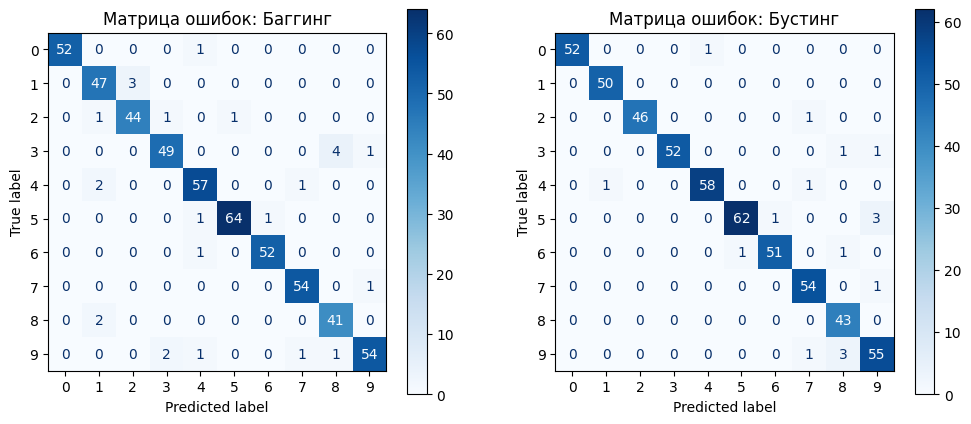

      Model  Accuracy  Precision (macro)  Recall (macro)  F1-score (macro)
0   Bagging  0.951852           0.950237        0.951610          0.950658
1  Boosting  0.968519           0.968821        0.970516          0.969212


In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay

print("\nСравнение моделей:")
print(f"Точность баггинг модели: {accuracy_bagging:.4f}")
print(f"Точность бустинг модели: {accuracy_boosting:.4f}")
# Визуализация матрицы ошибок для баггинга
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_estimator(bagging, X_test, y_test, ax=ax[0], cmap='Blues')
ax[0].set_title("Матрица ошибок: Баггинг")

# Визуализация матрицы ошибок для бустинга
ConfusionMatrixDisplay.from_estimator(boosting, X_test, y_test, ax=ax[1], cmap='Blues')
ax[1].set_title("Матрица ошибок: Бустинг")

plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Собираем метрики для каждой модели
metrics = {
    'Model': ['Bagging', 'Boosting'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_bagging),
        accuracy_score(y_test, y_pred_boosting)
    ],
    'Precision (macro)': [
        precision_score(y_test, y_pred_bagging, average='macro'),
        precision_score(y_test, y_pred_boosting, average='macro')
    ],
    'Recall (macro)': [
        recall_score(y_test, y_pred_bagging, average='macro'),
        recall_score(y_test, y_pred_boosting, average='macro')
    ],
    'F1-score (macro)': [
        f1_score(y_test, y_pred_bagging, average='macro'),
        f1_score(y_test, y_pred_boosting, average='macro')
    ]
}

# Выводим метрики в виде таблицы


df_metrics = pd.DataFrame(metrics)
print(df_metrics)